# Генетски алгоритам


Генетски алгоритам је оптимизациони метод који припада групи еволутивних алгоритама и заснива се на симулацији процеса еволуције
и природне селекције како би се пронашло оптимално решење. Овај приступ комбинује принципе селекције, укрштања и случајне мутације
како би створио „боље“ јединке у свакој генерацији (итерацији).
Основни поступак генетског алгоритма састоји се из:
* Кодирања јединки
* Генерисања почетне популације
* Рачунања вредности критеријума оптималности
* Селекција родитеља
* Укрштање
* Мутација

при чему се кораци оцене јединики и генерисања нових јединки понављају све док неки од критеријума није задовољен


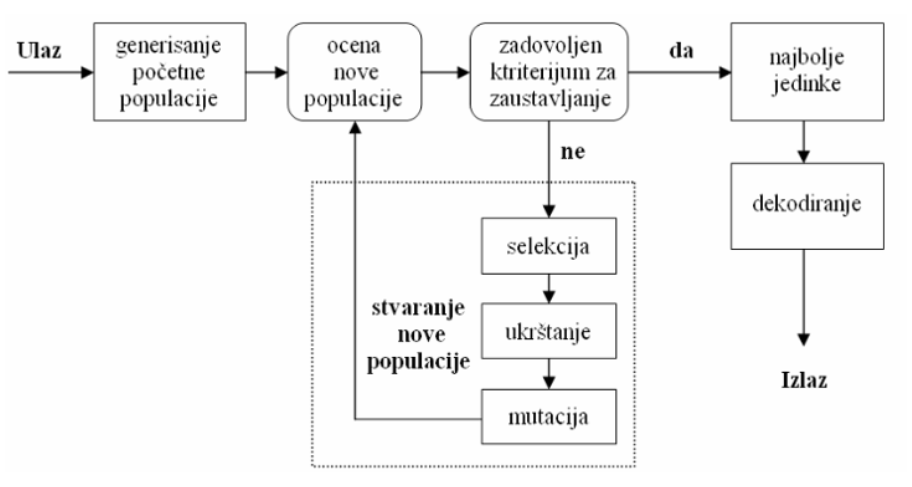

### Кодирање јединки

Јединке у генетском алгоритму представљају потенцијална решења проблема. Обично се кодирају као низови бинарних вредности, реалних бројева или другог формата у зависности од проблема. Дакле, први нетривијални корак алгоритма је одредити на који начин се репрезентују решења (јединке) алгоритма тако да буде у складу са поставком проблема. У зависности од тога који начин кодирања је одабран, мора се одабрати и адекватан начин вршења осталих операција (укрштање и мутација).
Неки од начина кодирања јединки су:
* бинарно кодирање- јединке се састоје из низа 0 ili 1
* реално кодирање- јединке се састоје из низа реалних бројева
* целобројно кодирање- јединке се састоје из низа целих бројева, где се може десити да се исти број сме поновити одређен број пута


### Генерисање почетне популације

Генетски алгоритам започињемо креирањем скупа јединки који се назива популацијом. Свака јединка представља потенцијално решење. Почетна популација се углавном генерише на насумичан начин, како би се покрио што већи део простора претраге. Важно је узети у обзир и одабир величине иницијалне популације. Већа иницијална популација углавном омогућава шири спектар простора решења, међутим, захтева и више ресурса и процесорског времена током итерација алгоритма

* Реално кодиране јединке

In [ ]:
import numpy as np
import random
import matplotlib.pyplot as plt
from math import sqrt, pow, sin, cos, pi

In [ ]:
# generisanje pocetne populacije u slucaju realno kodiranih jedinki
def generate_initial_population( chrom_size, max_val, min_val,population_size):
    #chrom_size-duzina jedinke
    #max_val-maksimalna vrednost gena
    #min_val-minimalna vrednost gena
    #population_size-velicina populacije
    population_list = np.random.uniform(min_val, max_val, (population_size,chrom_size)).tolist()
    return population_list

In [ ]:
generate_initial_population(20,2)  # generisanje 20 jedinki duzine 2

[[0.2813309398772912, -6.306275389183842],
 [-0.6061245741774908, -6.74284241064705],
 [7.8138363860635, -9.304591434983005],
 [-9.605066205760284, 3.3218124151546],
 [-9.886123425170927, -8.006972116420332],
 [-8.086286337563557, 6.697862557112629],
 [4.800405565637281, 3.8345836703963894],
 [-8.86983940103197, 3.9759626811651376],
 [-5.235735155340706, -3.7497166202250316],
 [-5.943304134123739, -6.975348925911716],
 [-8.357711773574199, -3.3913626658365477],
 [2.974526589805688, 4.200494278798246],
 [-1.5546381400536173, -6.84650410898342],
 [-6.251043479815923, 6.109493790593248],
 [9.999710366305983, 1.03828695061903],
 [-1.829953198261805, 6.293734224905702],
 [2.1175131641011387, -6.541122827567714],
 [-4.038174784312476, 4.425516992520407],
 [-2.165610884604094, 2.7074176748567496],
 [-6.1495153379017164, 4.878515139226206]]

* Бинарно кодиране јединке

  Да би представили реалну вредност у облику бинарног броја потребно је да дефинишемо прецизност, тј број бита регистра у $n$. Број различитих вредност који се може представити са тим број бита је $2^n$, најмања вредности $0$ док је највећа $2^n -1$.

  Ниво дискретизације
\begin{equation}
\Delta=\frac{opseg}{2^n}
\end{equation}
  При томе грешка која настаје је:
\begin{equation}
error=\frac{\Delta}{2}
\end{equation}

In [ ]:
# implementacija kodovanja binarne jedinke
def bin_encode(chromosome, bin_val, min_val, precision):
  #chromosome- vrednost jedne koordinate- realna vrednost
  # bin_val- nivo diskretizacije
  # min_val- minimalna  vrednost opsega
  # precision- broj bita za predstavljanje svakog broja

  ret = ""
  for g in chromosome:
    val = round((g - min_val)/bin_val)
    ret += bin(val)[2:].rjust(precision,'0') # transformisemo u binarni broj
  return ret

def bin_encode_chromosomes(chromosomes, precision, max_val, min_val):
  #chromosomes- ili jedinka
  # precision- broj bita za predstavljanje svakog broja
  # max_val, min_val- definišemo maksimalnu i minimalnu  vrednost opsega
  bin_val = (max_val - min_val) / (2**precision-1)  # nivo diskretizicije
  # za svaki hromozom unutar jedinke (npr i za x i y vrednost) pretvaramo u binarni broj
  bin_chromosomes = [ bin_encode(c, bin_val, min_val, precision) for c in chromosomes]
  return bin_chromosomes

def bin_decode(chromosome, bin_val, min_val, precision):

  ret = []
  for idx in range(0, len(chromosome), precision):
    g = int(chromosome[idx:idx + precision], 2)
    ret.append(g * bin_val + min_val)

  return ret

def bin_decode_chromosomes(chromosomes, precision, max_val, min_val):

  bin_val = (max_val - min_val) / (2**precision-1)

  bin_chromosomes = [ bin_decode(c, bin_val, min_val, precision) for c in chromosomes]
  return bin_chromosomes


In [ ]:
population_list=generate_initial_population(2,-5,5,20)
bin_chrom=bin_encode_chromosomes(population_list, 10,-5,5)
print(f"Binarno kodirane jedinke: {bin_chrom}")
dec_chrom=bin_decode_chromosomes(bin_chrom,10,-5,5)
print(f"Dekodiranejedinke: {dec_chrom}")

Binarno kodirane jedinke: ['11110010101001110101', '11001110111010001101', '01001010111001010110', '00001110101111001100', '10001100100001011001', '11001100000000110111', '00100010111111010100', '11101101000111110011', '11000010100101011001', '11100000000111111111', '11001010011000101101', '01100010100001000110', '11010100111100010101', '00111110010101010110', '01101001011101001000', '00011010001111100001', '00001100111111111101', '11010001001000000111', '00000011110111101110', '10110011001000101110']
Dekodiranejedinke: [[-4.481915933528837, -1.1485826001955033], [-3.0840664711632453, -1.3831867057673506], [2.0772238514173997, -0.8455522971652005], [4.433040078201368, -4.5014662756598245], [-0.4936461388074287, 4.130009775171065], [-2.9765395894428153, 4.46236559139785], [3.6412512218963835, -4.579667644183774], [-4.266862170087977, 0.12218963831867047], [-2.605083088954057, 1.627565982404692], [-3.7585532746823063, 0.004887585532746819], [-2.90811339198436, -0.4447702834799605], [1.14

### Оцена вредности критеријума оптималности

Оцена јединки представља корак генетског алгоритма у којем се свако потенцијално решење оцењује како би се утврдио квалитет јединке. Оцена јединке назива се још и прилагођеност јединке у складу са задатим критеријумом оптималности. У наставку је пример функције за оцењивање вредности критеријумуа уколико је циљ минимизација функције $z^2=x^2+y^2$

In [ ]:
# ocena vrednosti kriterijuma optimalnosti
def fitness_function(chrom):
    return chrom[0]**2 + chrom[1]**2

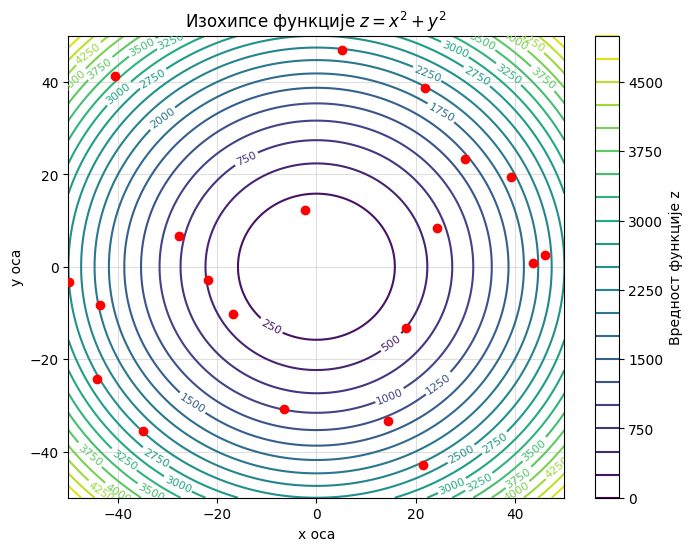

In [ ]:

x = np.linspace(-50, 50, 500)
y = np.linspace(-50, 50, 500)

X, Y = np.meshgrid(x, y)

Z = X**2 + Y**2

population=generate_initial_population(2,-50,50,20)
points_x = [ind[0] for ind in population]
points_y = [ind[1] for ind in population]
plt.figure(figsize=(8, 6))
contour = plt.contour(X, Y, Z, levels=20, cmap='viridis')
plt.clabel(contour, inline=True, fontsize=8)
plt.scatter(points_x, points_y, color='red', label='Генерисане тачке', zorder=5)
plt.title(r'Изохипсе функције $z = x^2 + y^2$')
plt.xlabel('x оса')
plt.ylabel('y оса')
plt.grid(alpha=0.4)
plt.colorbar(contour, label='Вредност функције z')
plt.show()

### Селекција

Корак селекције у генетском алгоритму игра кључну улогу у одабиру родитељских јединки, односно јединки које ће учествовати у репродукцији (укрштању). Основни циљ селекције је идентификација "прилагођенијих" јединки, које ће имати веће шансе да пренесу своје особине на потомке, чиме се постепено побољшава популација сваком следећом генерацијом.
Постоје различити начини за одабир родитељских јединки, најчешћи су рулетска селекција и турнирска селекција

In [ ]:
# implementacija ruletske selekcije
def rank_chromosomes(cost, chromosomes): # funckija za rangiranje jedinki
  costs = list(map(cost, chromosomes))
  ranked  = sorted( list(zip(chromosomes,costs)), key = lambda c:c[1])
  return list(zip(*ranked))

def roulette_selection(ranked_population_list): # funkciji se prosledjuje lista jedinki koja je sortirana na osnovo vrednosti kriterijuma

  pairs = []
  i = 0
  for i in range(0, len(ranked_population_list), 2): # biranje se vrsi u n/2 iteracija, jedna jedinka moze biti birana vise puta ukoliko je izuzetno prilagodjena
    weights=[];
    for i in range(len(ranked_population_list)):
        weights.append((len(ranked_population_list)-i)*random.random()) # rang jedinke mnozi se nasumicnim brojem kako bi i "najlosije" jedinke imale sansu za ukrstanje
    if (weights[0]>=weights[1]):
        maxInd1=0;
        maxInd2=1;
    else:
        maxInd1=1;
        maxInd2=0;

    for i in range(2,len(ranked_population_list)): #pronalaze se najbolje jedinke i vracaju se kao parovi jedinki za ukstanje
        if weights[i]>weights[maxInd1]:
            maxInd2=maxInd1
            maxInd1=i
        elif weights[i]>weights[maxInd2]:
            maxInd2=1
    pairs.append([ranked_population_list[maxInd1], ranked_population_list[maxInd2]])

  return pairs

### Укрштање

Укрштање је процес који симулира генетску комбинацију два родитеља како би се створиле новe потомачке јединке. Основна идеја је да потомци наследе карактеристике од оба родитеља. Углавном се селекцијом бирају два родитеља чијим се укрштањем добијају два потомка, према томе уколико је почетна популација садржала $n$ јединки, након укрштања остаће $2n$ јединки у популацији (од којих касније бирано $n$ најбољих које се преносе у следећу генерацију)  Начин укрштања се прилагођава начину кодирања јединки и проблему. Уколико су јединке бинарно кодиране врши се једнотачкасто, двотачкасто или униформно укрштање. Код реално кодираних једники укрштање се може вршити и насумичним одабиром две потомачке јединке на дужи која спаја родитељске јединке. Код целобројног кодирања, укршање се може имплементирати на специифичне начине који су описани у наставку





* Једнотачкасто укрштање

  Јединке се деле на два дела на основу случајно одабране тачке. Потомци се стварају комбиновањем делова од оба родитеља.

In [ ]:
def one_point_crossover(pairs):
  length = len(pairs[0])
  children = []

  for (a,b) in pairs: # za svaki par roditeljskih jedinki uksrtanjem na nasumican se generisu dve potomacke jedinke

      r1 = random.randrange(0, length) # vrsi se kombinovanje i spajanje roditeljskih jedinki u jednoj nasumicno odabranoj tacki


      children.append(a[:r1] + b[r1:])
      children.append(b[:r1] + a[r1:] )


  return children

* Двотачкасто укрштање

  Одабирају се две тачке и размењују се средњи делови између родитеља.

In [ ]:
def two_point_crossover(pairs):
  length = len(pairs[0])
  children = []

  for (a,b) in pairs: # za svaki par roditeljskih jedinki uksrtanjem na nasumican se generisu dve potomacke jedinke

      r1 = random.randrange(0, length) # vrsi se kombinovanje i spajanje roditeljskih jedinki izmedju dve nasumicno odabrane tacke
      r2 = random.randrange(0, length)

      if r1 < r2:
        children.append(a[:r1] + b[r1:r2] + a[r2:])
        children.append(b[:r1] + a[r1:r2] + b[r2:])
      else:
        children.append(a[:r2] + b[r2:r1] + a[r1:])
        children.append(b[:r2] + a[r2:r1] + b[r1:])

  return children

* Реално укрштање

In [ ]:
# implementacija ukrstanja za realno kodirane jedinke
def crossover(pairs):

  children = []

  for a,b in pairs: # za svaki par roditeljskih jedinki uksrtanjem na nasumican se generisu dve potomacke jedinke
    r=random.random()
    y1=[]
    y2=[]
    for i in range(0,len(a)):
      y1.append(r * a[i] + (1 - r) * b[i])
      y2.append((1 - r) *  a[i] + r*b[i])
    children.append(y1)
    children.append(y2)


  return children

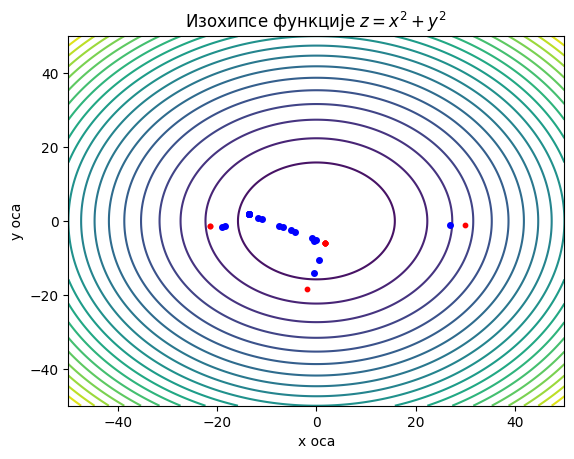

In [ ]:
population_size = 20
chrom_size = 2
population = generate_initial_population(chrom_size, -50,50, population_size)

ranked_population, costs = rank_chromosomes(fitness_function, population)

pairs = roulette_selection(ranked_population)


children = crossover(pairs)

x = np.linspace(-50, 50, 500)
y = np.linspace(-50, 50, 500)
X, Y = np.meshgrid(x, y)
Z = X**2 + Y**2


plt.contour(X, Y, Z, levels=20, cmap="viridis")
plt.clabel(contour, inline=True, fontsize=8)
for pair in pairs:
    for parent in pair:
        plt.scatter(parent[0], parent[1], color='red', s=10)

for c in children:
    plt.plot(c[0], c[1], 'bo', markersize=4)

plt.title(r'Изохипсе функције $z = x^2 + y^2$')
plt.xlabel('x оса')
plt.ylabel('y оса')
plt.show()


* Природна селекција

  Уколико је величина популације $n$, након укрштања се тај број повећава $2n$, а у наредну генерацију прелази $n$ најприлагођенијих јединки

In [ ]:
def natural_selection(chromosomes, n_keep):
  return chromosomes[:n_keep]

### Мутација

  Мутација подразумева насумичну измену генетског материјала јединки, чиме се обезбеђује разноврсност у популацији и омогућава истраживање нових делова простора претраге и избегавање локалних екстрема. Као и претходне операције, имплементација оператора мутације зависи од одабира кодирања јединки

* Мутација бинарно кодираних јединки

  * Мутација ротацијом

    Насумично бирамо две  тачке у хромозому и генетски материјал који се налази између те две тачке ротирамо.
  * Мутација инверзијом

    Насумично бирамо једну тачку у хромозому и генетски материјал који се налази у тој тачки инвертујемо.





In [ ]:
# mutacija rotacijom

def mutation_rot(chromosomes, mutation_rate):
  mutated_chromosomes = []

  for chromosome in chromosomes:

    if random.random() < mutation_rate:
      r1 = random.randrange(0, len(chromosome) - 1)
      r2 = random.randrange(0, len(chromosome) - 1)


      if r1 < r2:
        mutated_chromosomes.append(chromosome[:r1] + chromosome[r1:r2][::-1] + chromosome[r2:])
      else:
        mutated_chromosomes.append(chromosome[:r2] + chromosome[r2:r1][::-1] + chromosome[r1:])

    else:
      mutated_chromosomes.append(chromosome)


  return mutated_chromosomes

In [ ]:
# mutacija inverzijom

def mutation_inv(chromosomes, mutation_rate):
  mutated_chromosomes = []
  for chromosome in chromosomes:

    if random.random() < mutation_rate:
      r1 = random.randrange(0, len(chromosome) - 1)
      mutated_chromosomes.append( chromosome[:r1]+ str (1-int(chromosome[r1]))+ chromosome[r1+1:]    )
    else:
      mutated_chromosomes.append(chromosome)


  return mutated_chromosomes

* Мутација реално кодираних јединки

  Мутација реалних јединки врши се додавањем насумичне вредности одређеном гену јединке


In [ ]:
def mutation(chromosomes, mutation_rate,mutation_width):
  mutated_chromosomes = []
  for chromosome in chromosomes:
    y1=[]
    for i in range(0,len(chromosome)):
      if random.random() < mutation_rate:
        r=random.random()

        y1.append( chromosome[i] + mutation_width * 2 * (r - 0.5) )
      else:
        y1.append(chromosome[i])

    mutated_chromosomes.append(y1)
  return mutated_chromosomes

Јасно је да је један од неопходних аргумената фунцкије вероватноћа мутације. То је параметар генетског алгоритма који се може подешавати. Као што је речено, мутација доприноси ширењу простора претраге и избегавању локалних екстрема, према томе, уколико је вероватнћа мутације јако мала, може се десити да алгоритам конвергира ка локалом екстрему, међутим уколико је вероватноћа мутације јако велика, може се десити да је претрага превише насумична

### Елитизам

Како се оперором мутације мења генетски материјал јединки, потребно је јединке које су јако добро прилагођене сачувати од потенцијалих измена, како се јако добра решења не би изгубила. Елитизам је механизам који чува одређени проценат најбоље прилагођених јединки

In [ ]:
def elitis(chromosomes_old,chromosomes_new, elitis_rate, population_size):

  old_ind_size=int(np.round(population_size*elitis_rate))
  return chromosomes_old[:old_ind_size]+chromosomes_new[:(population_size-old_ind_size)]

* Критеријум заустављања-

  * Максимални број итерација или генерација – алгоритам се зауставља након унапред дефинисаног броја генерација.
  * Довољно добра фитнес вредност – ако најбоља јединка у популацији достигне или пређе унапред постављен праг вредности критеријума оптималности.
  * Недостатак напретка – ако се  вредност критеријума оптималности најбоље јединке не мења значајно током више узастопних генерација.



# ПРИМЕР 1

У насатвку је имплементиран генетски алгоритам за одређивање минимума функције $z^2=x^2+y^2$

In [ ]:
def population_stats(costs):
  return costs[0], sum(costs)/len(costs)

In [ ]:
def genetic(cost_func, extent, population_size, mutation_rate = 0.8,elitis_rate=0.1, chromosome_length = 2, max_iter = 100):

  min_val = extent[0]
  max_val = extent[1]


  avg_list = []
  best_list = []
  curr_best = 99999999
  same_best_count = 0


  chromosomes = generate_initial_population(chromosome_length, max_val, min_val, population_size)

  for iter in range(max_iter):

    ranked_parents, costs = rank_chromosomes(cost_func, chromosomes)
    best, average = population_stats(costs)
    parents = natural_selection(ranked_parents, population_size)

    pairs = roulette_selection (parents)

    children = crossover(pairs)

    chromosomes = mutation(children, mutation_rate,1)

    ranked_children, costs = rank_chromosomes(cost_func, chromosomes)
    chromosomes=elitis(ranked_parents,ranked_children, elitis_rate, population_size)
    print("Generation: ",iter+1," Average: {:.3f}".format(average)," Curr best: {:.3f}".format(best),
         "[X, Y] = {:.3f} {:.3f}".format(chromosomes[0][0],chromosomes[0][1]))
    print("-------------------------")

    avg_list.append(average)
    if best < curr_best:
      best_list.append(best)
      curr_best = best
      same_best_count = 0
    else:
      same_best_count += 1
      best_list.append(best)

    ##
    if (cost_func(chromosomes[0]) < 0.00005):

      avg_list = avg_list[:iter]
      best_list = best_list[:iter]

      print("\nSolution found ! Chromosome content: [X, Y] = {:.3f} {:.3f}\n".format(chromosomes[0][0],chromosomes[0][1]))
      return chromosomes[0][0],chromosomes[0][1]

    if same_best_count > 20:
      print("\nStopped due to convergance.Best chromosome [X, Y] = {:.3f} {:.3f}\n".format(chromosomes[0][0],chromosomes[0][1]))

      avg_list = avg_list[:iter]
      best_list = best_list[:iter]

      return chromosomes[0][0],chromosomes[0][1]

    if iter == 499:
      avg_list = avg_list[:iter]
      best_list = best_list[:iter]


      print("\nStopped due to max number of iterations, solution not found. Best chromosome [X, Y] = {:.3f} {:.3f}\n".format(chromosomes[0][0],chromosomes[0][1]))
      return chromosomes[0][0],chromosomes[0][1]

In [ ]:
x,y=genetic(fitness_function, [-10, 10], 50)


Generation:  1  Average: 56.234  Curr best: 0.178 [X, Y] = 0.332 0.261
-------------------------
Generation:  2  Average: 1.230  Curr best: 0.056 [X, Y] = -0.210 0.110
-------------------------
Generation:  3  Average: 0.463  Curr best: 0.018 [X, Y] = 0.097 0.090
-------------------------
Generation:  4  Average: 0.458  Curr best: 0.000 [X, Y] = 0.021 -0.007
-------------------------
Generation:  5  Average: 0.355  Curr best: 0.000 [X, Y] = 0.015 -0.014
-------------------------
Generation:  6  Average: 0.360  Curr best: 0.000 [X, Y] = 0.015 -0.014
-------------------------
Generation:  7  Average: 0.387  Curr best: 0.000 [X, Y] = 0.015 -0.014
-------------------------
Generation:  8  Average: 0.412  Curr best: 0.000 [X, Y] = 0.010 0.000
-------------------------
Generation:  9  Average: 0.450  Curr best: 0.000 [X, Y] = 0.010 0.000
-------------------------
Generation:  10  Average: 0.527  Curr best: 0.000 [X, Y] = 0.010 0.000
-------------------------
Generation:  11  Average: 0.388  

# ПРИМЕР 2 - *Levy* функција

*Levy* функција једна је од стандардних фунцкија за тестирање оптимизационих алгоритама и дефинише се на следећи начин

$
f(x, y) = \sin^2(3\pi x) + (x - 1)^2 \left( 1 + \sin^2(3\pi y) \right) + (y - 1)^2 \left( 1 + \sin^2(2\pi y) \right)
$

In [ ]:
def levy_function(chromosome):
  x = chromosome[0]
  y = chromosome[1]

  tmp1 = pow(sin(3*pi*x), 2)
  tmp2 = pow((x - 1), 2) * (1 + pow(sin(3*pi*y), 2))
  tmp3 = pow((y - 1), 2) * (1 + pow(sin(2*pi*y), 2))

  return tmp1 + tmp2 + tmp3

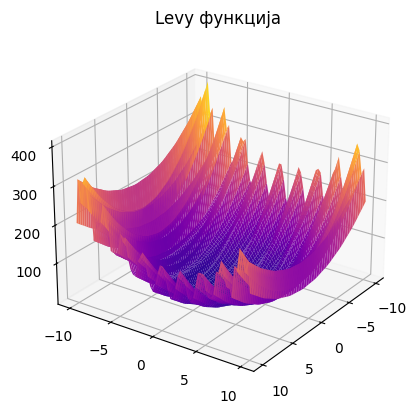

In [ ]:
# plotovanje levy funkcije
def levy_functionPlt(x,y):

  tmp1 = np.power(np.sin(3*pi*x), 2)
  tmp2 = np.power((x - 1), 2) * (1 + np.power(np.sin(3*pi*y), 2))
  tmp3 = np.power((y - 1), 2) * (1 + np.power(np.sin(2*pi*y), 2))

  return tmp1 + tmp2 + tmp3
x = np.linspace(-10, 10, 70)
y = np.linspace(-10, 10, 70)

X, Y = np.meshgrid(x, y)
Z = levy_functionPlt(X, Y)
fig=plt.figure()
ax = fig.add_subplot(111,projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1,
                cmap='plasma', edgecolor='none')
ax.set_title('Levy функција')
ax.view_init(25, 35)


Generation:  1  Average: 86.168  Curr best: 14.171 [X, Y] = 0.850 -1.682
-------------------------
Generation:  2  Average: 15.176  Curr best: 1.160 [X, Y] = 0.958 2.004
-------------------------
Generation:  3  Average: 2.441  Curr best: 0.397 [X, Y] = 0.698 0.629
-------------------------
Generation:  4  Average: 1.260  Curr best: 0.198 [X, Y] = 0.999 0.661
-------------------------
Generation:  5  Average: 1.205  Curr best: 0.198 [X, Y] = 0.999 0.661
-------------------------
Generation:  6  Average: 0.808  Curr best: 0.037 [X, Y] = 0.985 0.891
-------------------------
Generation:  7  Average: 1.122  Curr best: 0.037 [X, Y] = 0.985 0.891
-------------------------
Generation:  8  Average: 1.176  Curr best: 0.037 [X, Y] = 0.985 0.891
-------------------------
Generation:  9  Average: 0.929  Curr best: 0.037 [X, Y] = 0.985 0.891
-------------------------
Generation:  10  Average: 1.041  Curr best: 0.037 [X, Y] = 0.985 0.891
-------------------------
Generation:  11  Average: 0.983  Cu

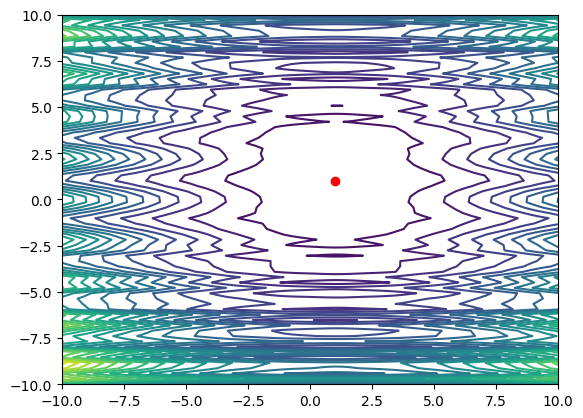

In [ ]:
x,y=genetic(levy_function, [-10,10], 20)

plt.contour(X, Y, Z, levels=20, cmap="viridis")
plt.scatter(x,y, color="red")
plt.show()

# Параметри генетског алгоритма

Најважнији параметри укључују величину популације, вероватноћу мутације, максимални број генерација и начин селекције. Величина популације  утиче на разноликост могућих решења – већа популација омогућава боље истраживање просторa решења, али повећава и рачунарску сложеност. Вероватноћа мутације одржава разноликост популације, спречавајући алгоритам да се заглави у локалним минимумима. Начин селекције, као што су рулетска селекција или турнирска селекција, утиче на то како се фаворизују јединке које су боље прилагођене. Неправилна подешавања ових параметара могу довести до споре конвергенције, прекомерног истраживања и слично. Због тога је често потребно експериментално подешавање параметара.